In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded X_train shape: (28824, 1, 21), y_train shape: (28824,)
Loaded X_test shape: (7207, 1, 21), y_test shape: (7207,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0731 - loss: 3.3200 - val_accuracy: 0.4394 - val_loss: 1.8498
Epoch 2/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3563 - loss: 1.9351 - val_accuracy: 0.6426 - val_loss: 1.1178
Epoch 3/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5114 - loss: 1.3986 - val_accuracy: 0.7802 - val_loss: 0.7708
Epoch 4/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6041 - loss: 1.1181 - val_accuracy: 0.8335 - val_loss: 0.5804
Epoch 5/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6553 - loss: 0.9356 - val_accuracy: 0.8572 - val_loss: 0.4877
Epoch 6/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6854 - loss: 0.8450 - val_accuracy: 0.8821 - val_loss: 0.4067
Epoch 7/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7150 - loss: 0.7618 - val_accuracy: 0.8961 - val_loss: 0.3678
Epoch 8/400
901/901 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7388 - loss: 0.7026 - val_ac

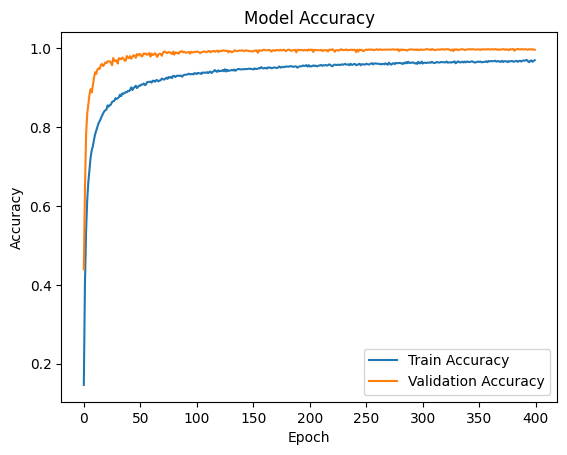

Model saved to /content/drive/MyDrive/train test


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set paths for loading and saving data
data_folder = '/content/drive/MyDrive/train test'
model_save_folder = '/content/drive/MyDrive/train test'
os.makedirs(model_save_folder, exist_ok=True)  # Create the model folder if it doesn't exist

# Load the data from .npy files
X_train = np.load(os.path.join(data_folder, 'X_train.npy'))
y_train = np.load(os.path.join(data_folder, 'y_train.npy'))
X_test = np.load(os.path.join(data_folder, 'X_test.npy'))
y_test = np.load(os.path.join(data_folder, 'y_test.npy'))

# Confirm the shapes of the loaded data
print(f'Loaded X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'Loaded X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

# Define the model
model = Sequential()

# LSTM Layer
model.add(LSTM(64, return_sequences=True, input_shape=(1, 21)))  # Adjust the input shape based on your data
model.add(Dropout(0.5))  # Dropout for regularization

# Another LSTM Layer
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the trained model to Google Drive
model.save(os.path.join(model_save_folder, 'sign_language_model.h5'))
model.save(os.path.join(model_save_folder, 'sign_language_model.keras'))

print(f'Model saved to {model_save_folder}')
